In [216]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [217]:
# Reading the data
df = pd.read_csv('day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [218]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [219]:
# Checking the size
df.shape

(730, 16)

In [220]:
# Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [221]:
# Describing
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [222]:
# Describing the size
df.size

11680

In [223]:
# Checking missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [224]:
# Dropping the column
df.drop(['instant'],axis=1,inplace=True)
df.drop(['dteday'],axis=1,inplace=True)
df.drop(['casual'],axis=1,inplace=True)
df.drop(['registered'],axis=1,inplace=True)

In [225]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [227]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [228]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


In [229]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [230]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

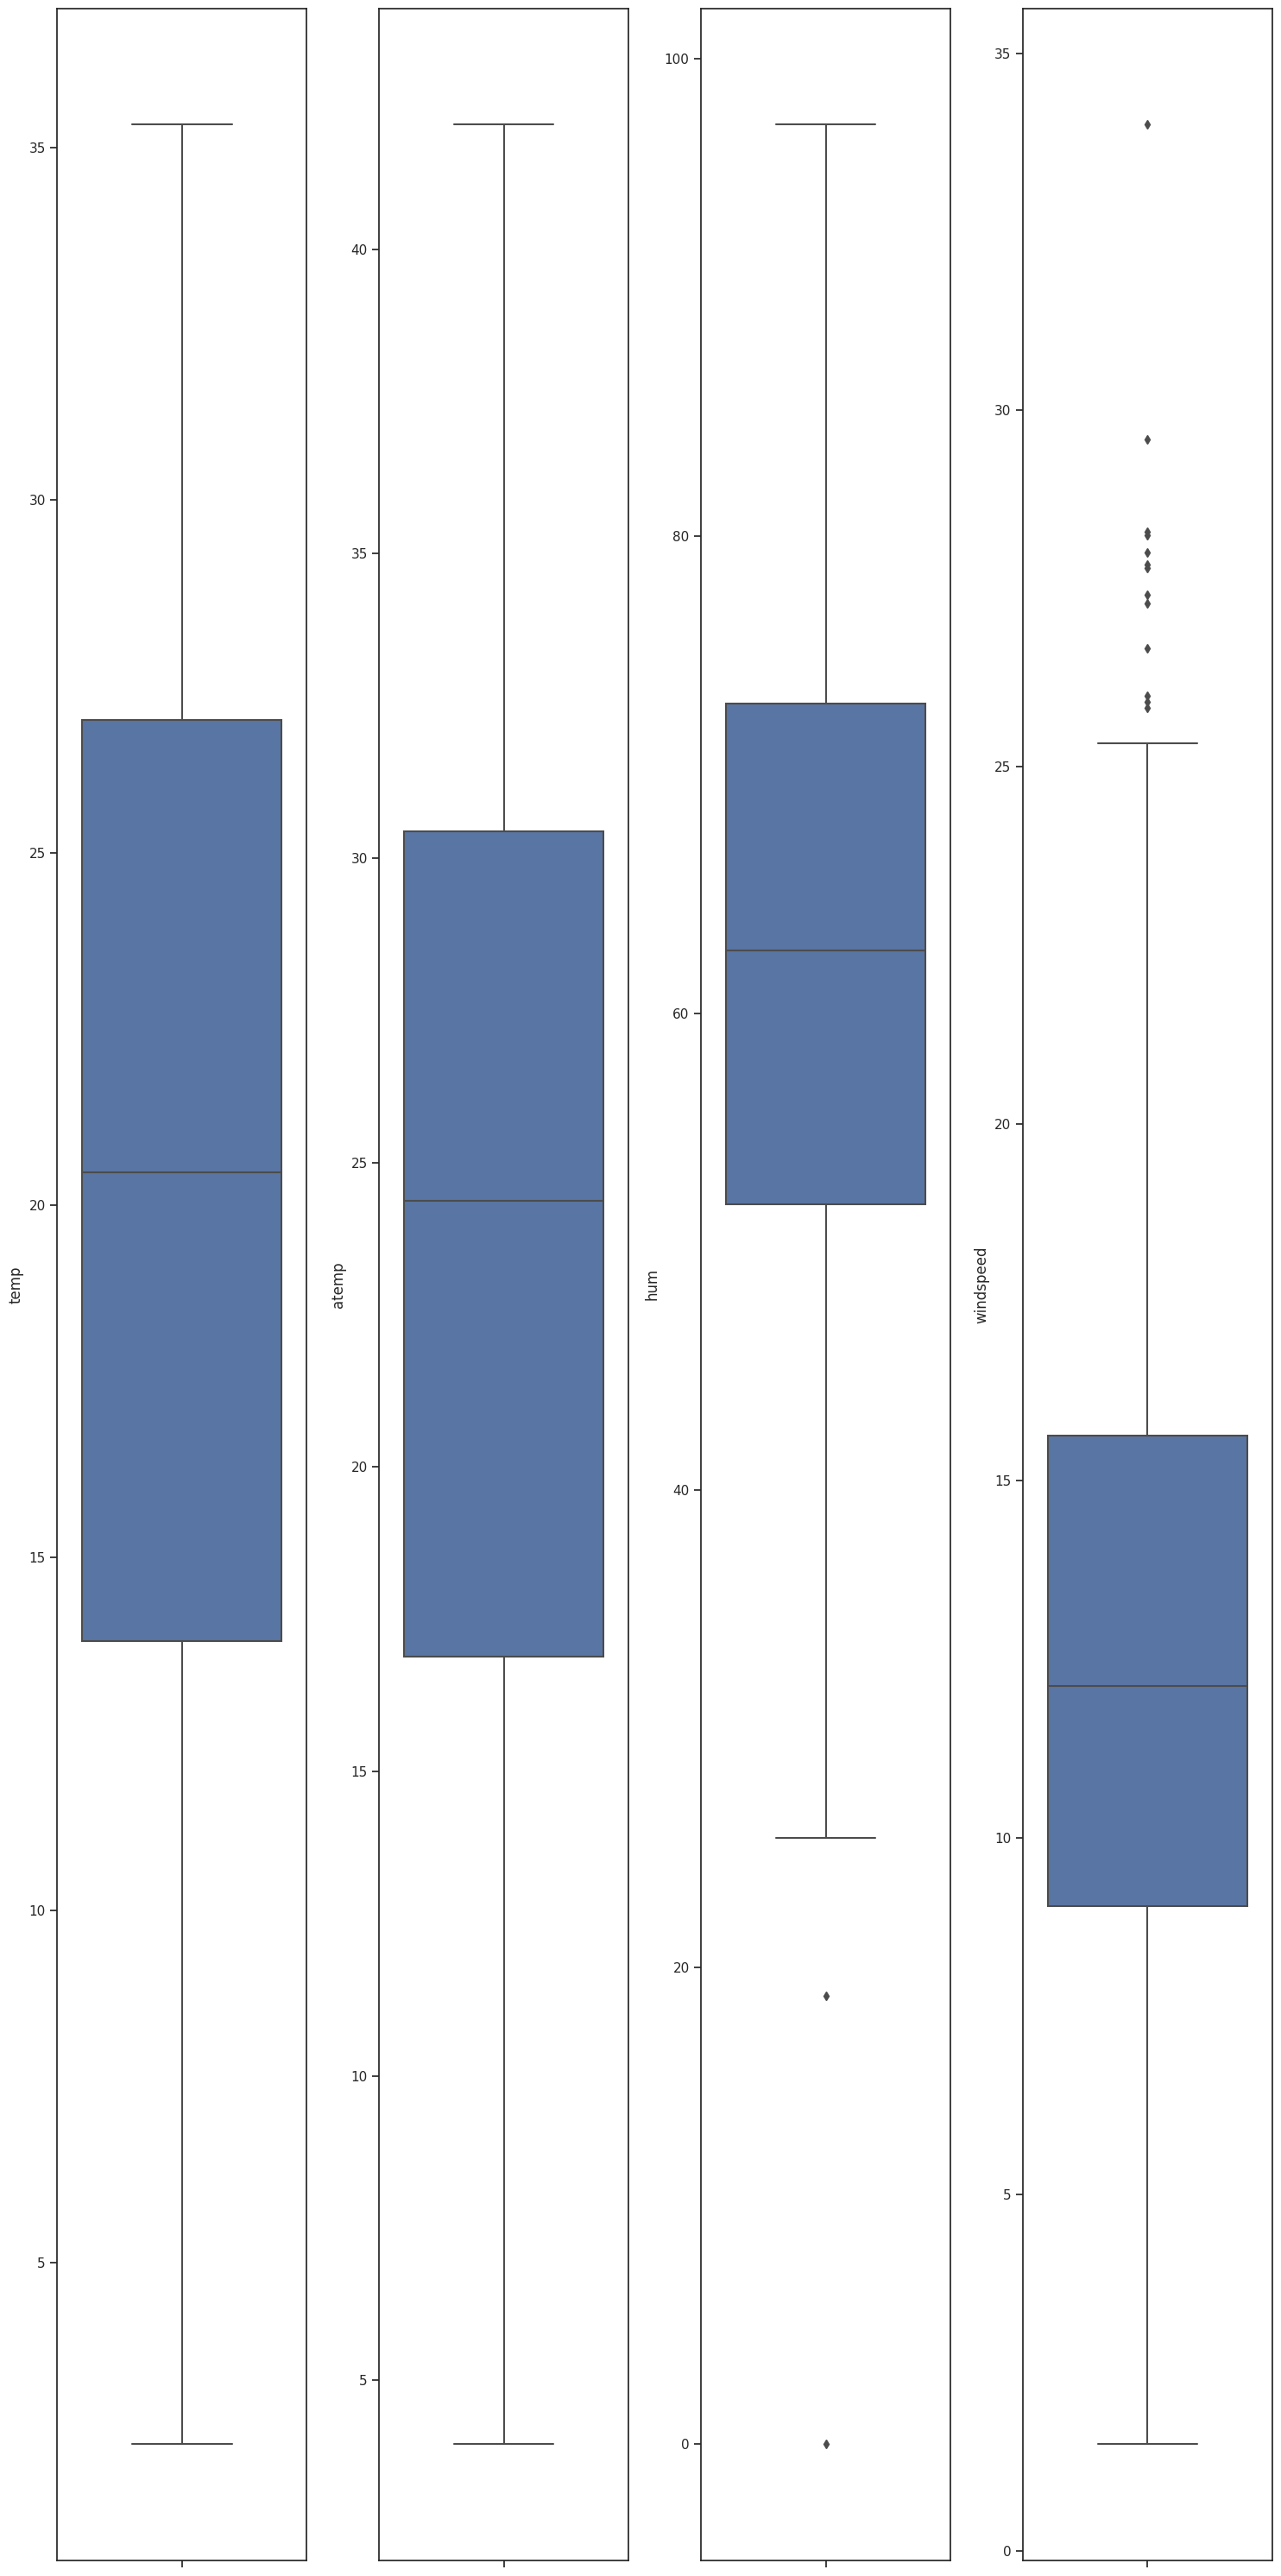

In [231]:
cols = ['temp', 'atemp', 'hum', 'windspeed']
fig, axes = plt.subplots(1, 4, figsize=(15, 30))
for i, col in enumerate(cols, 1):
    sns.boxplot(y=col, data=df, ax=axes[i-1])
plt.tight_layout()
plt.show()

In [232]:
# Create a mapping dictionary for season
season_mapping = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}
df['season'] = df['season'].map(season_mapping)
# Create a mapping dictionary for weathersit
weather_mapping = {1: 'good', 2: 'moderate', 3: 'bad', 4: 'severe'}
df['weathersit'] = df['weathersit'].map(weather_mapping)
# Create a mapping dictionary for month
month_mapping = {1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sept', 10: 'oct', 11: 'nov', 12: 'dec'}
df['mnth'] = df['mnth'].map(month_mapping)
# Create a mapping dictionary for weekday
weekday_mapping = {0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'}
df['weekday'] = df['weekday'].map(weekday_mapping)

In [233]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


<Figure size 1500x3000 with 0 Axes>

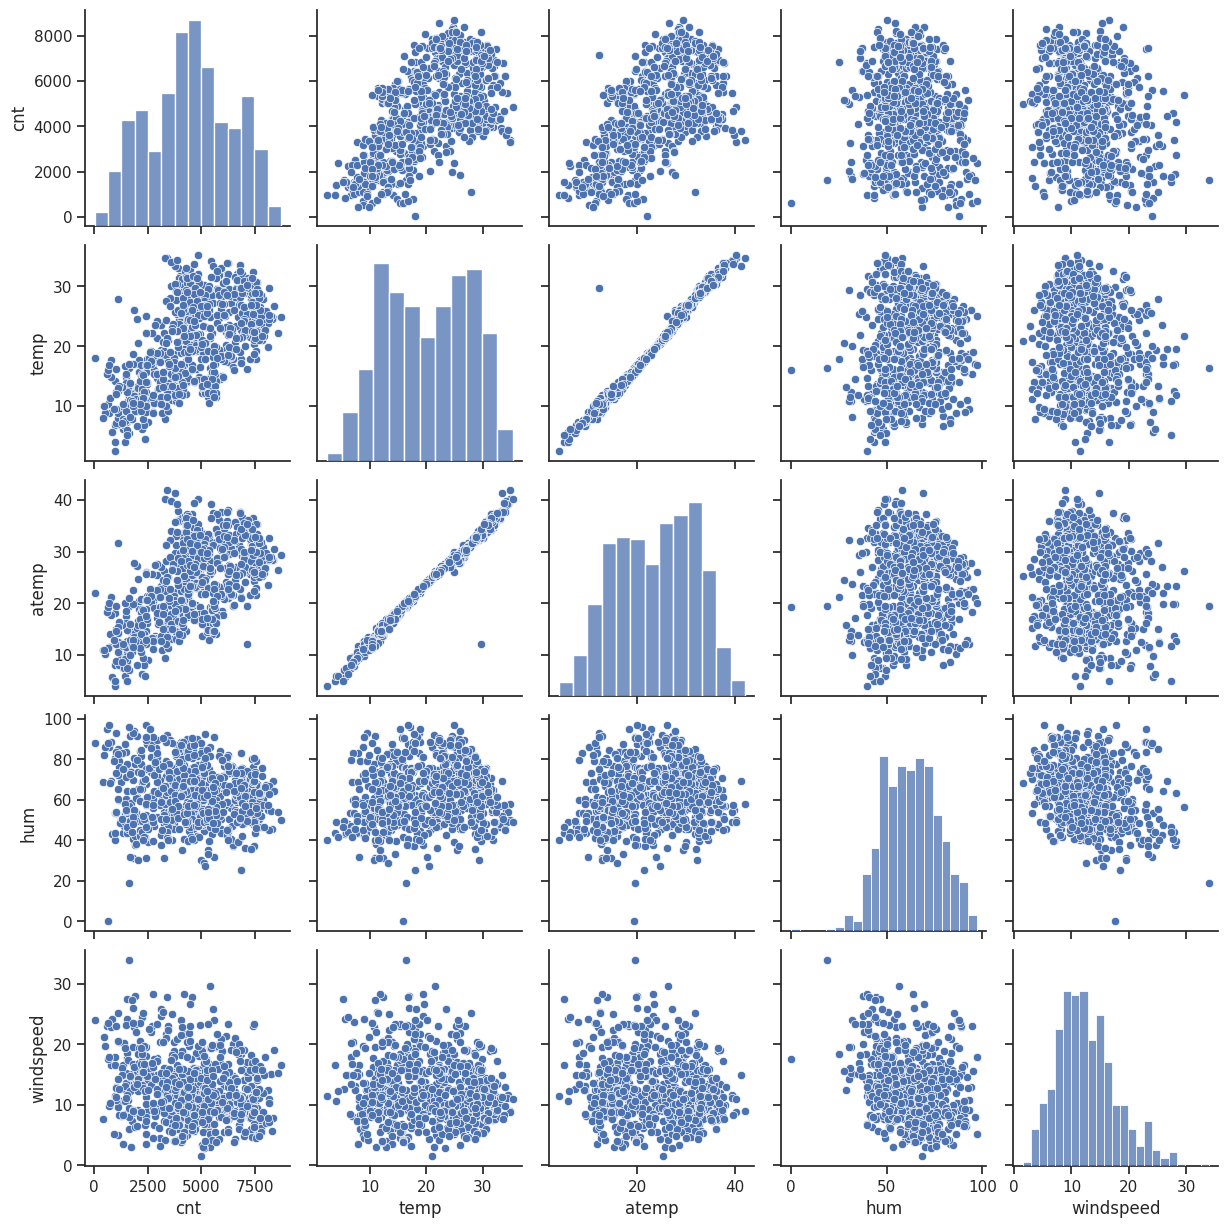

In [234]:
plt.figure(figsize=(15, 30))
sns.set(style="ticks")
sns.pairplot(df[['cnt', 'temp', 'atemp', 'hum', 'windspeed']])
plt.show()

<Figure size 1500x3000 with 0 Axes>

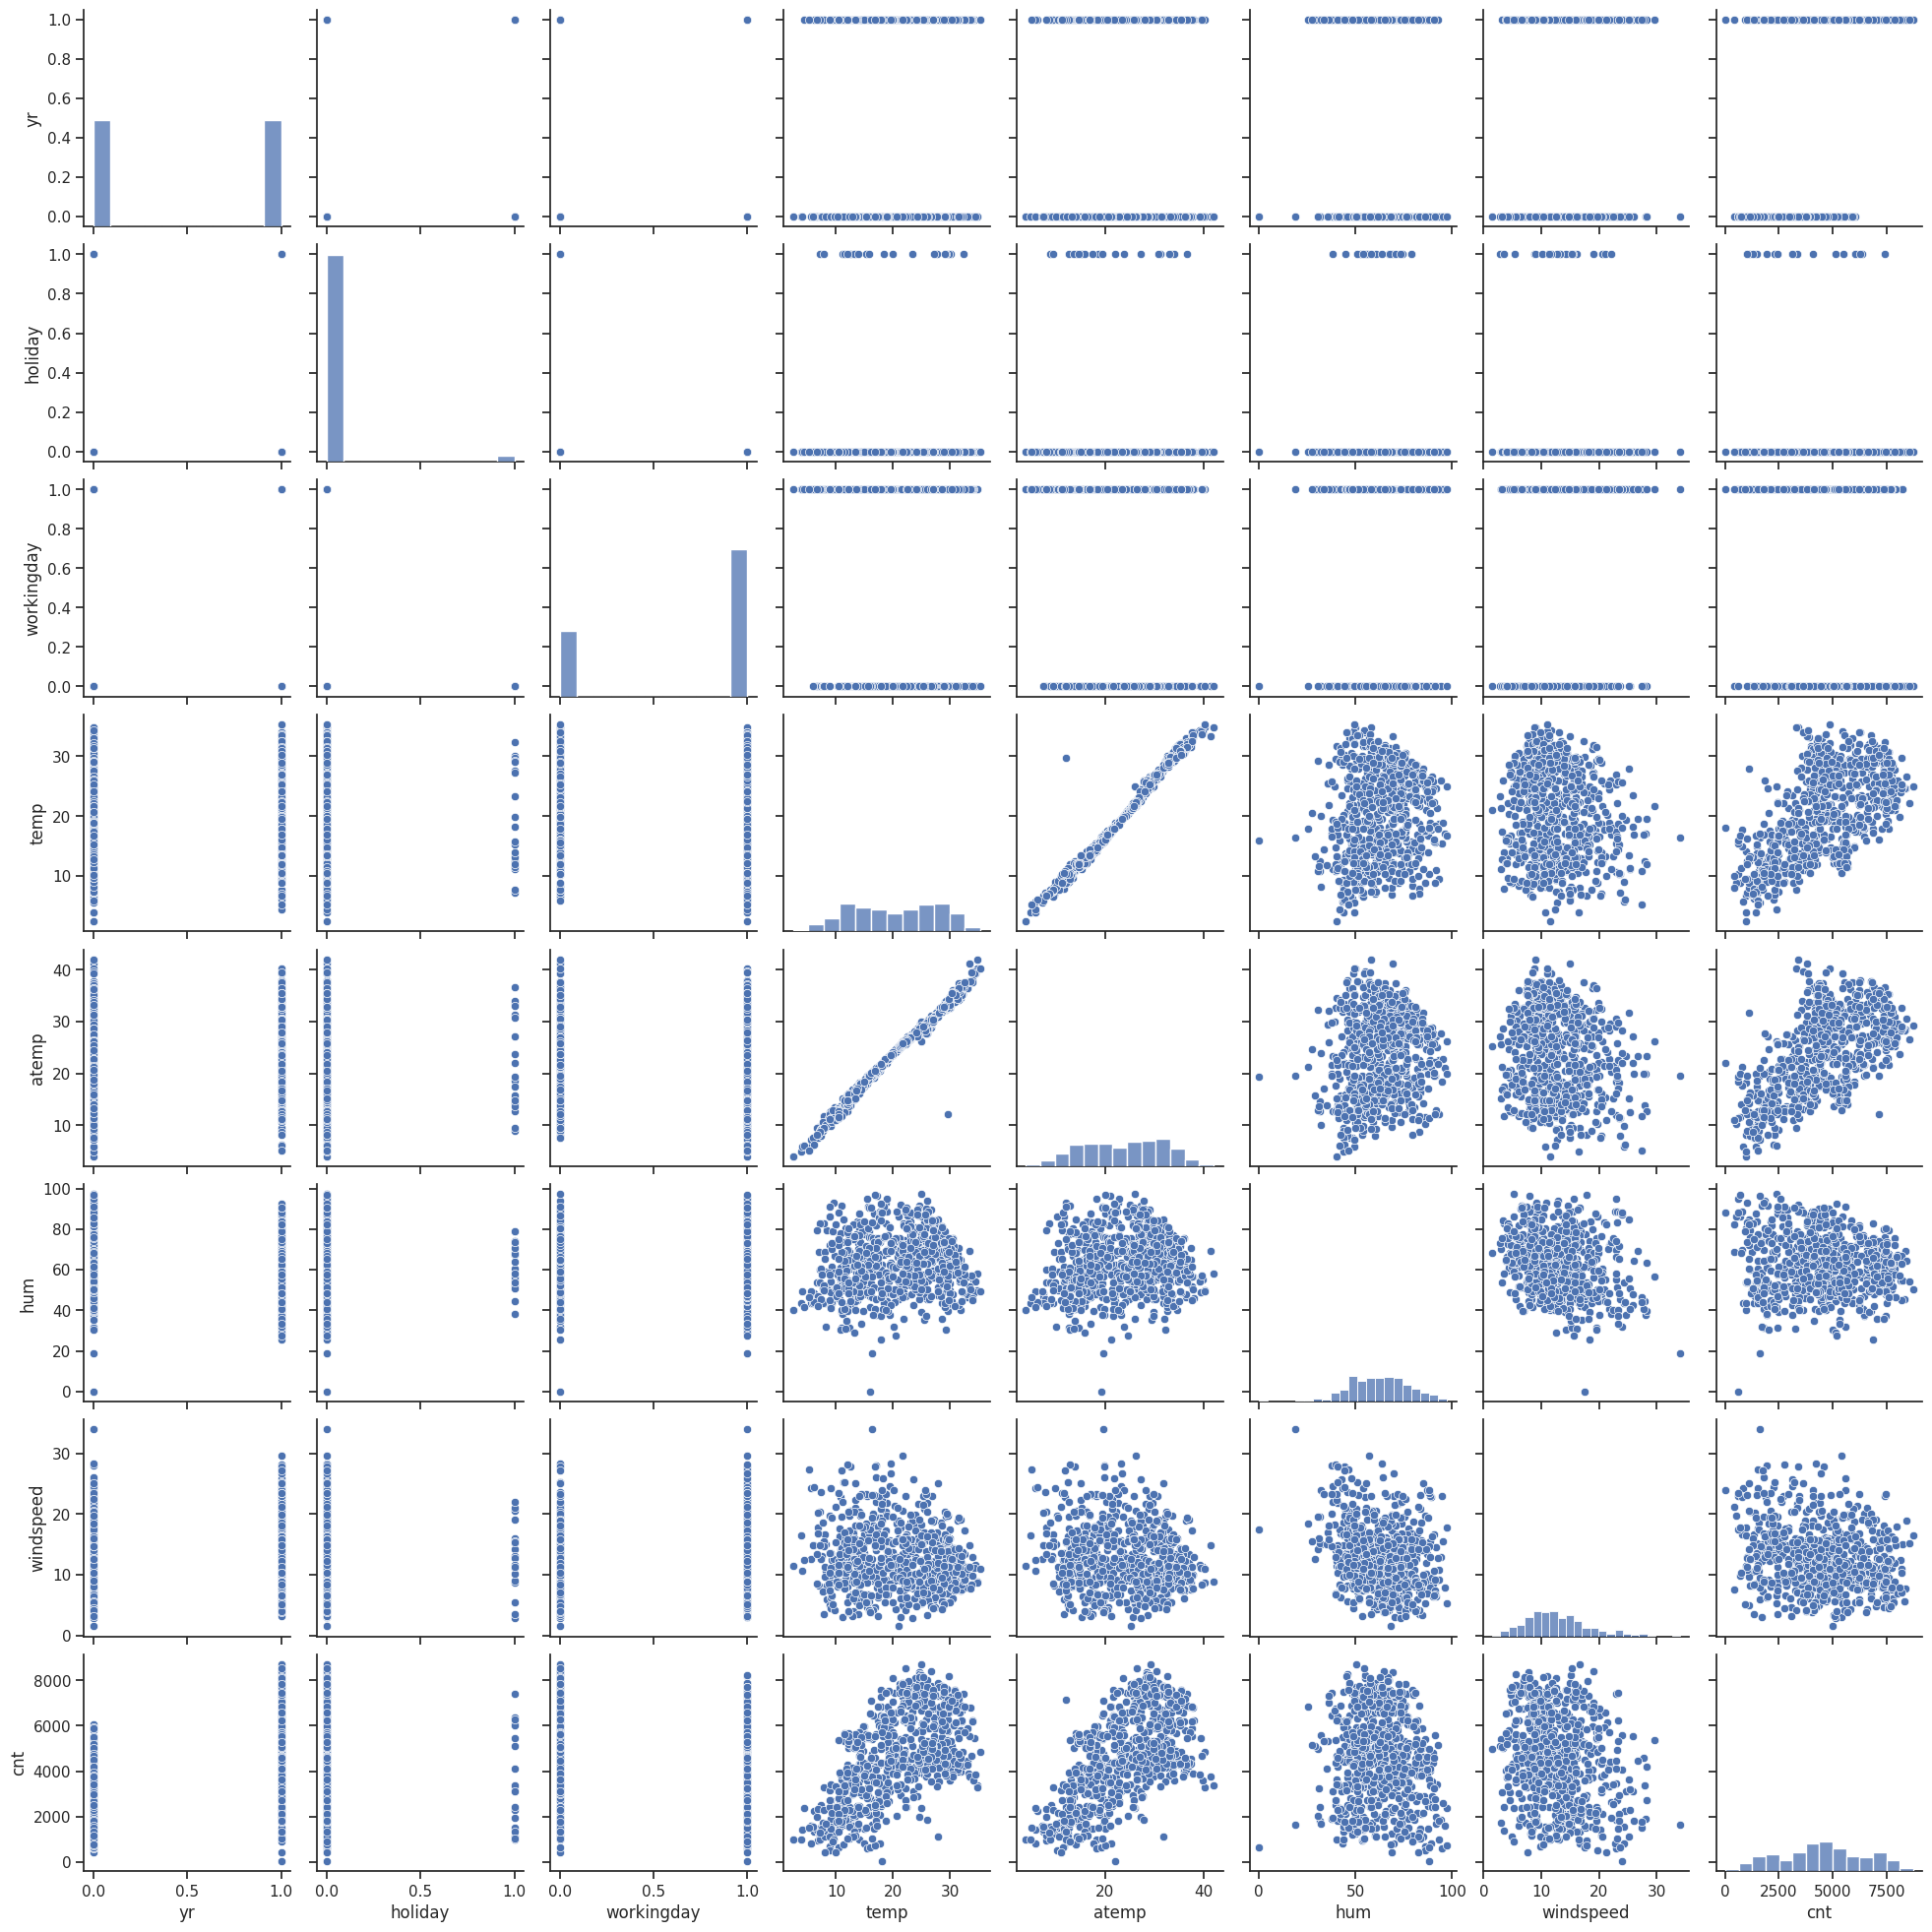

In [235]:
plt.figure(figsize=(15,30))
sns.pairplot(df)
plt.show()

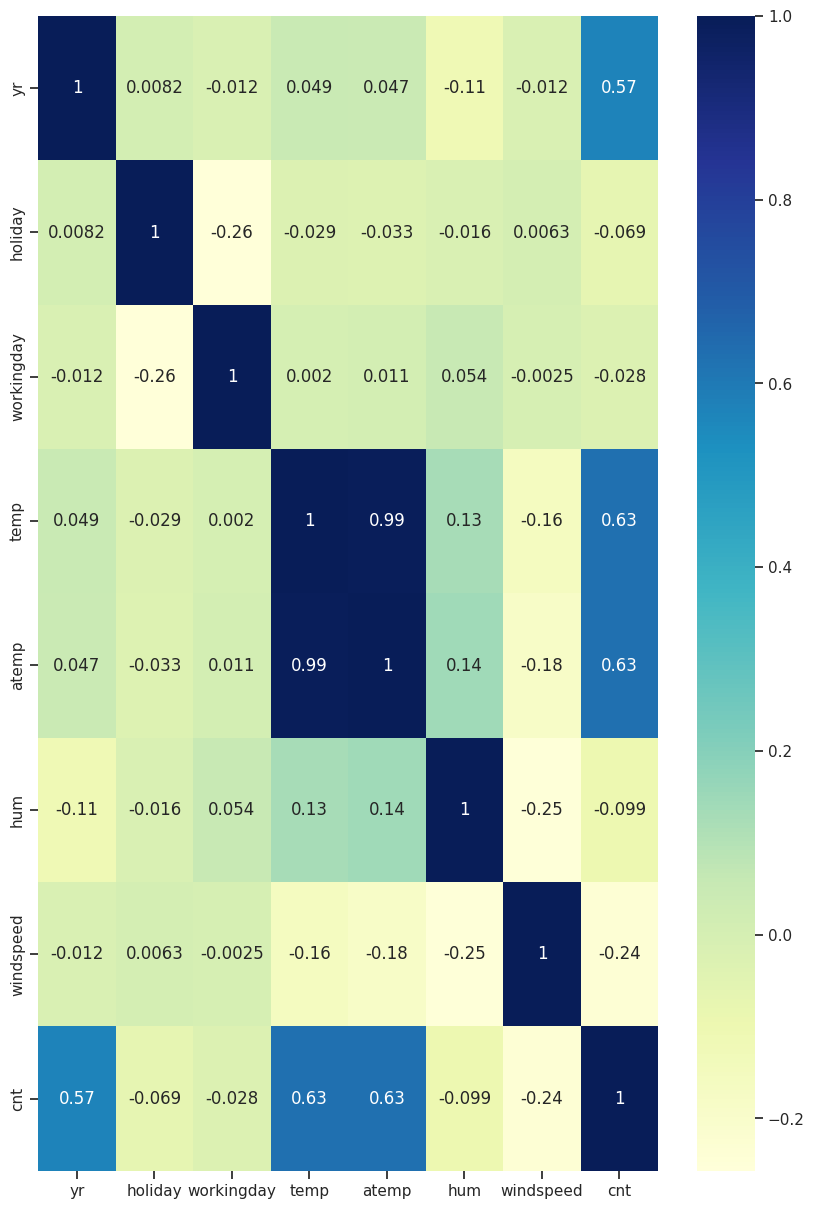

In [236]:
plt.figure(figsize=(10, 15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.show()

<Figure size 1000x1500 with 0 Axes>

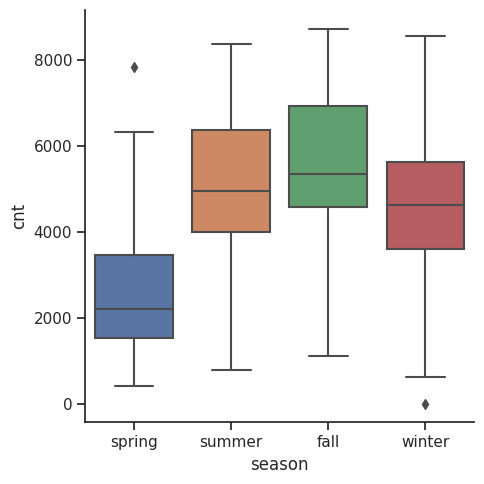

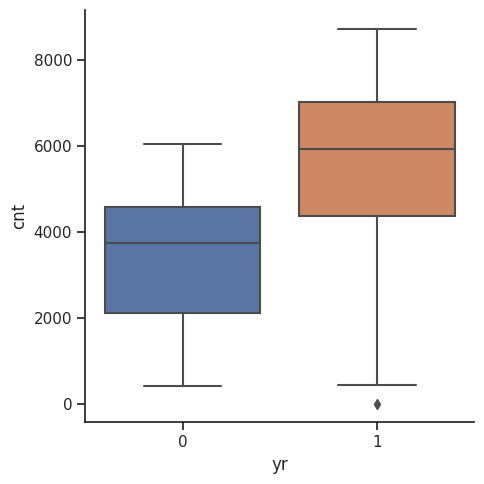

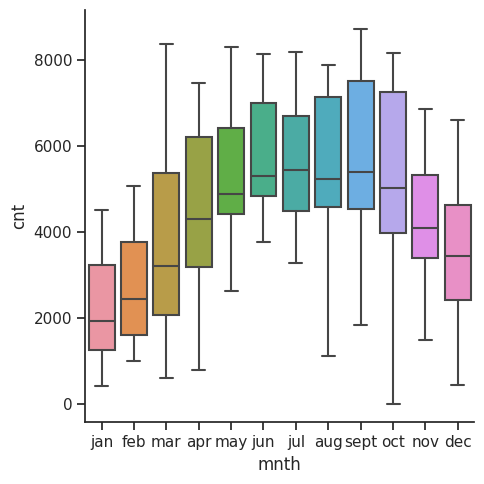

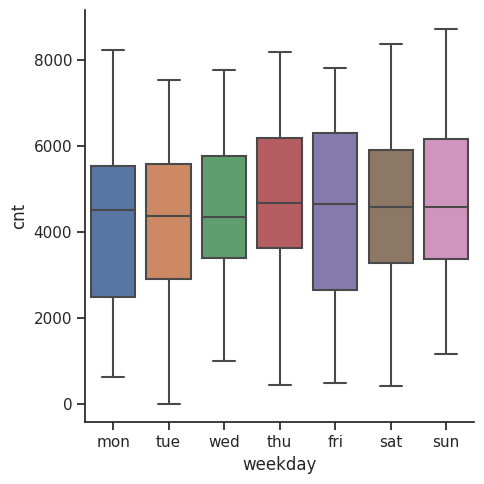

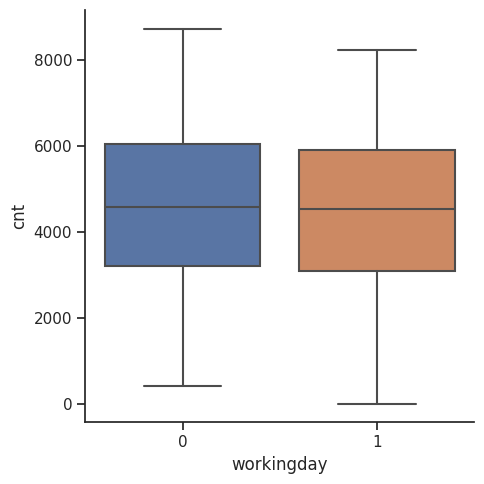

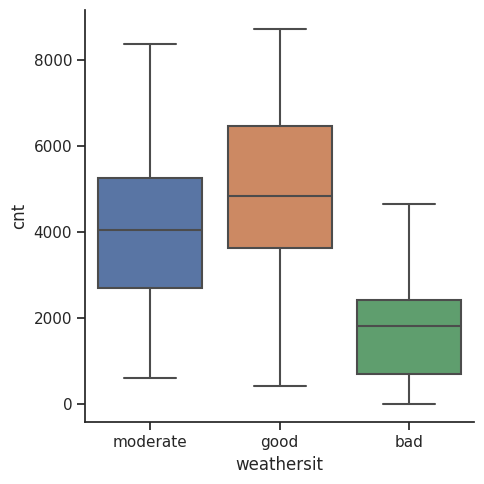

In [237]:
plt.figure(figsize=(10, 15))
# Box plots using Seaborn's catplot
sns.catplot(x='season', y='cnt', kind='box', data=df, height=5, aspect=1)
sns.catplot(x='yr', y='cnt', kind='box', data=df, height=5, aspect=1)
sns.catplot(x='mnth', y='cnt', kind='box', data=df, height=5, aspect=1)
sns.catplot(x='weekday', y='cnt', kind='box', data=df, height=5, aspect=1)
sns.catplot(x='workingday', y='cnt', kind='box', data=df, height=5, aspect=1)
sns.catplot(x='weathersit', y='cnt', kind='box', data=df, height=5, aspect=1)
# Display the plots
plt.show()

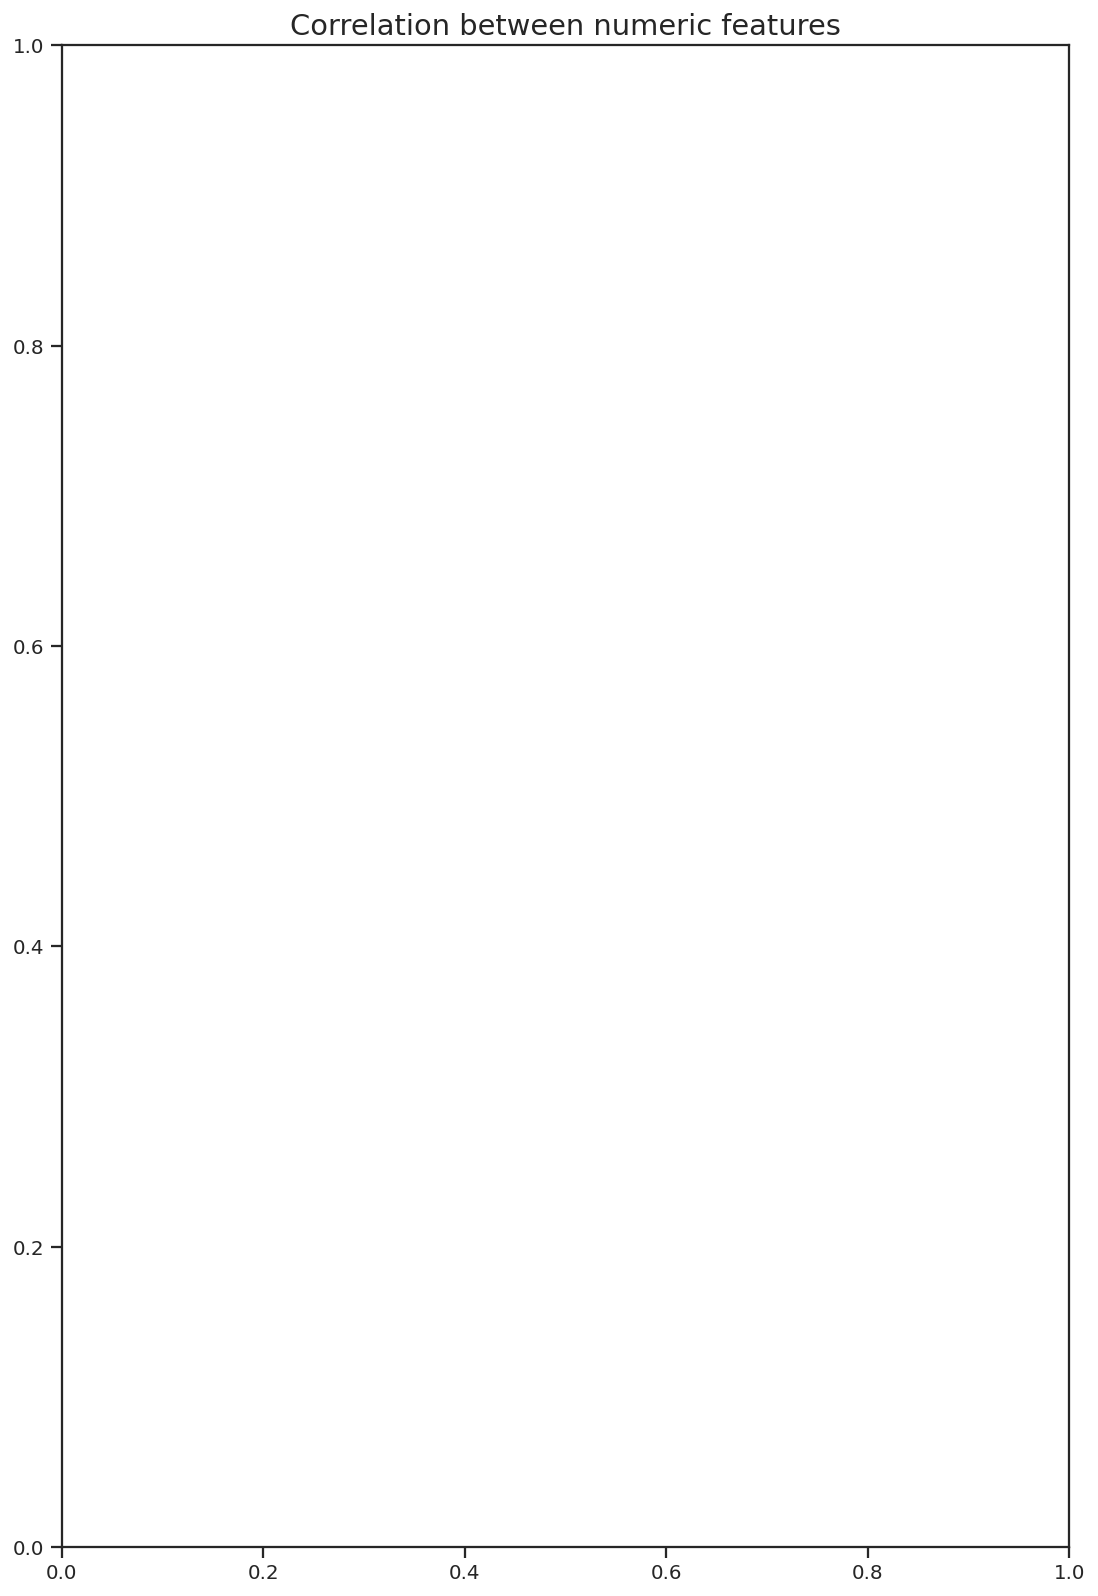

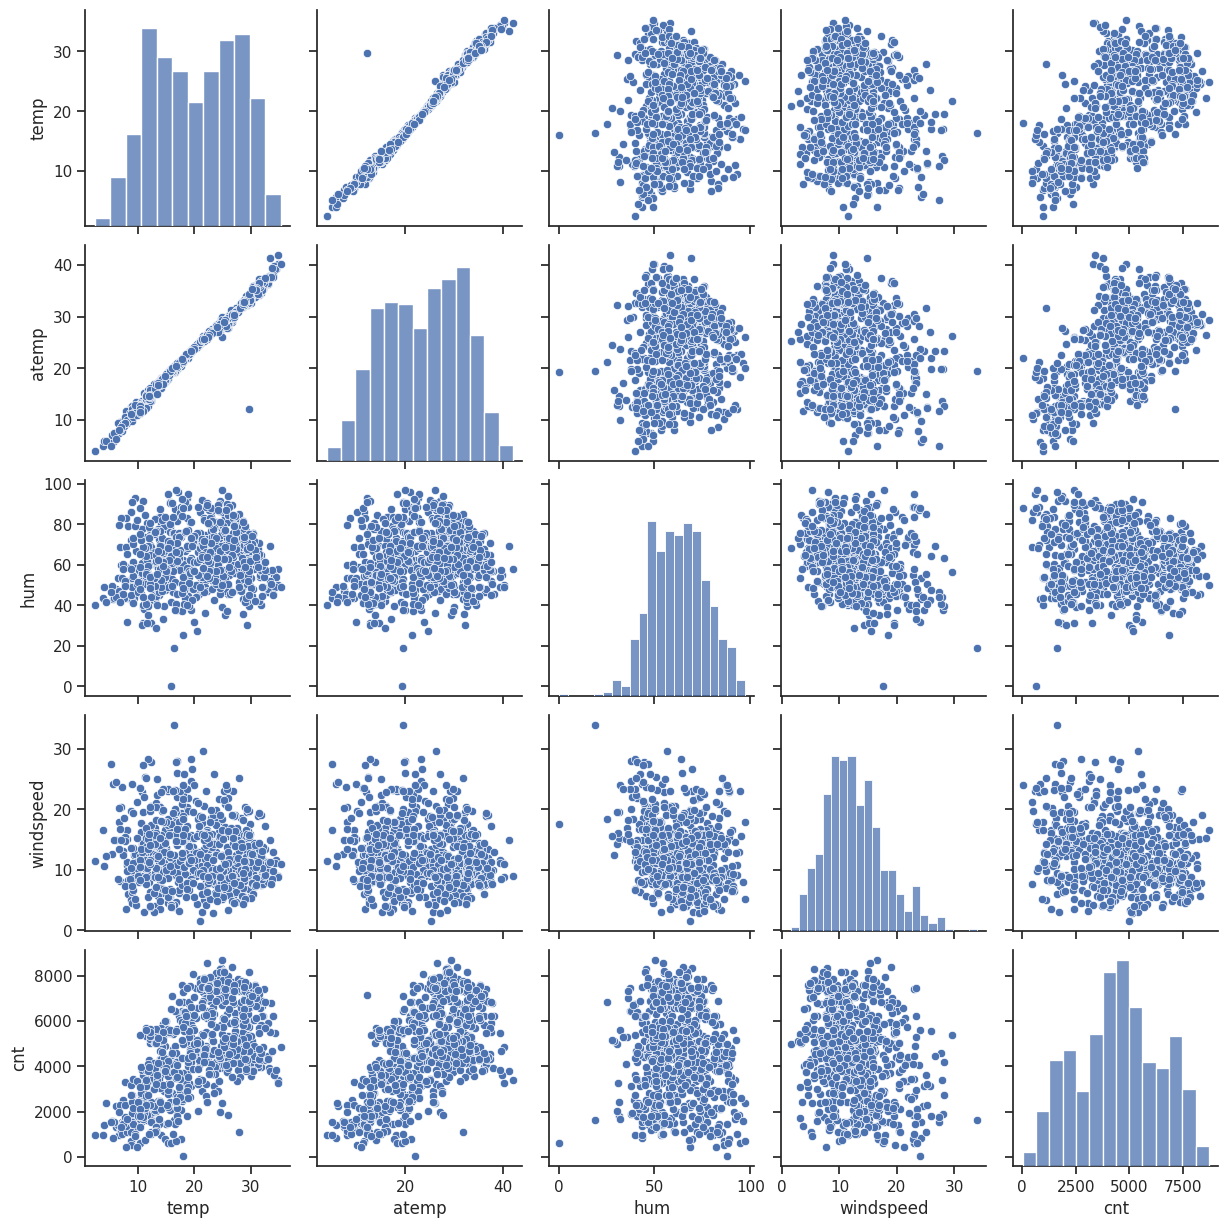

In [238]:
num_features = ["temp", "atemp", "hum", "windspeed", "cnt"]
plt.figure(figsize=(10, 15), dpi=130)
plt.title("Correlation between numeric features", fontsize=16)
# Using pairplot to visualize pairwise relationships
sns.pairplot(df[num_features])
plt.show()

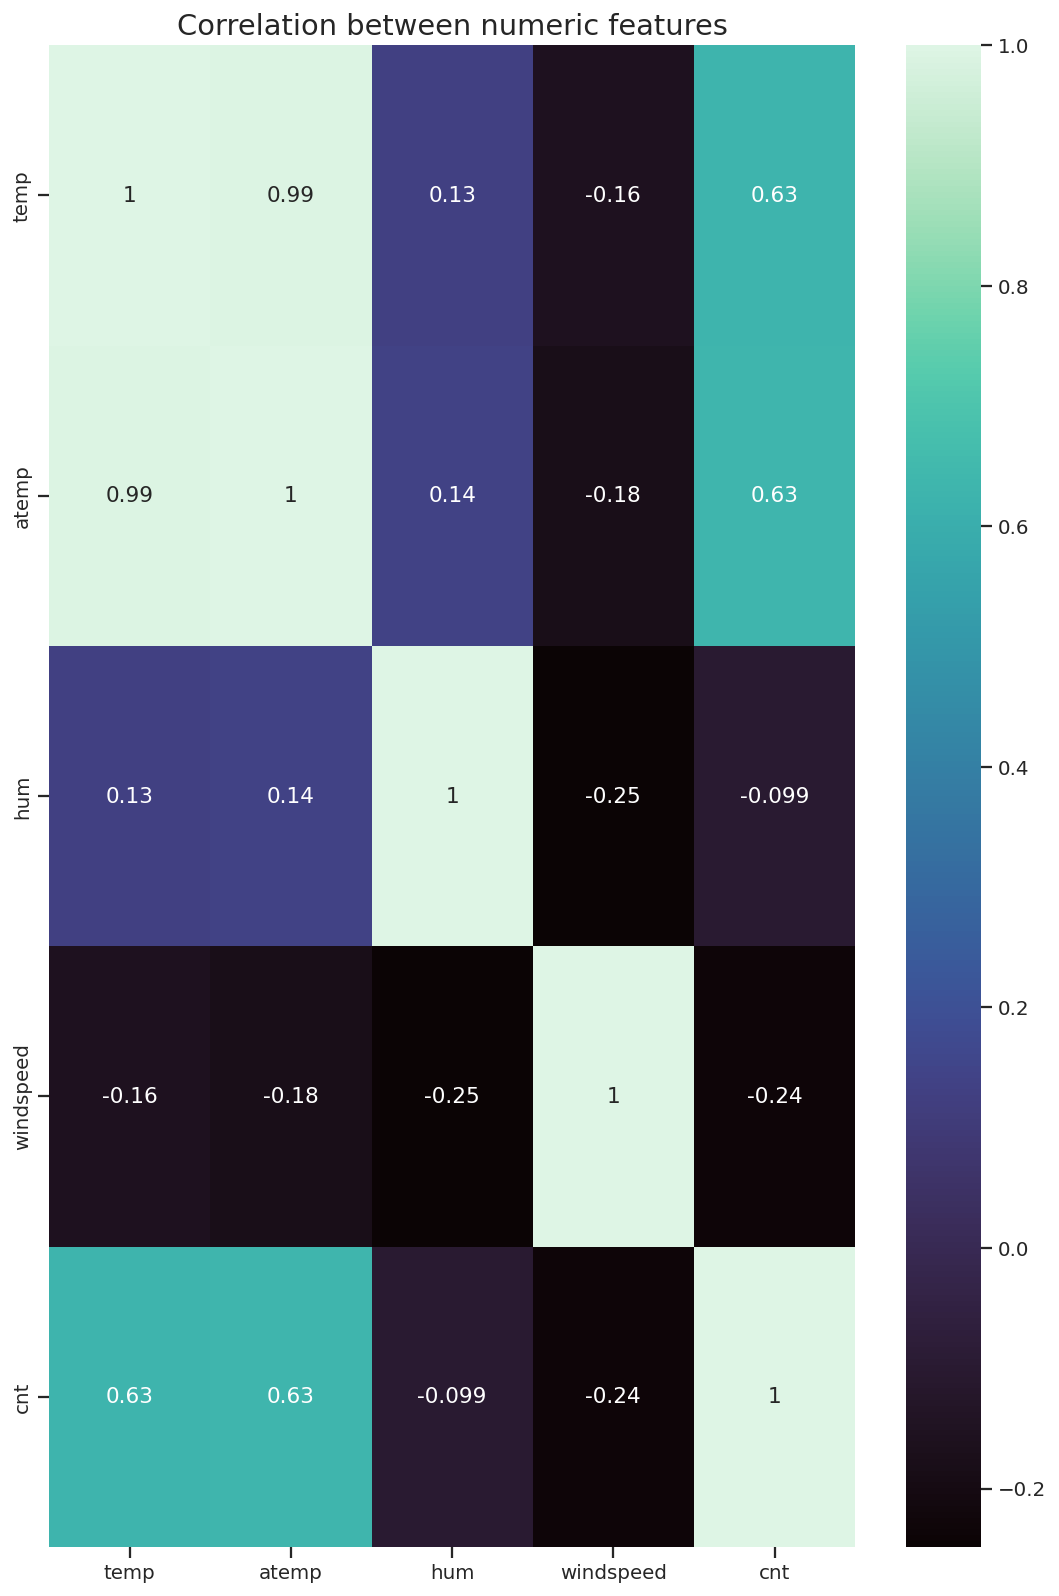

In [239]:
num_features = ["temp", "atemp", "hum", "windspeed", "cnt"]
plt.figure(figsize=(10, 15), dpi=130)
plt.title("Correlation between numeric features", fontsize=16)
# Create a correlation matrix for the specified numeric features
correlation_matrix = df[num_features].corr()
# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="mako")
plt.show()

In [240]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [241]:
# Assuming df is your DataFrame
df = pd.get_dummies(data=df, columns=["season", "mnth", "weekday"], drop_first=True)
df = pd.get_dummies(data=df, columns=["weathersit"])
# Display the DataFrame
print(df)

     yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0     0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1     0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2     0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3     0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4     0        0           1   9.305237  11.46350  43.6957  12.522300  1600   
..   ..      ...         ...        ...       ...      ...        ...   ...   
725   1        0           1  10.420847  11.33210  65.2917  23.458911  2114   
726   1        0           0  10.386653  12.75230  59.0000  10.416557  3095   
727   1        0           0  10.386653  12.12000  75.2917   8.333661  1341   
728   1        0           1  10.489153  11.58500  48.3333  23.500518  1796   
729   1        0           1   8.849153  11.17435  57.7500  10.374682  2729   

     season_spring  season_summer  ...  mnth_sept  

In [242]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [243]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


In [244]:
df.shape

(730, 31)

In [245]:
# Assuming df is your DataFrame
y = df.pop('cnt')
X = df
# Alternative code using tuple unpacking
data_splits = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = data_splits

In [246]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [247]:
# Checking the shape and size
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


In [248]:
# Assuming X_train is your training set and num_vars is the list of numerical variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed']
scaler = MinMaxScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [249]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,0.230920,0.258317,0.250489,...,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,0.421834,0.438138,0.433719,...,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.000000,1.000000,0.500000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [250]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,1,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,...,0,0,0,0,0,0,1,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,...,0,0,0,0,1,0,0,0,0,1


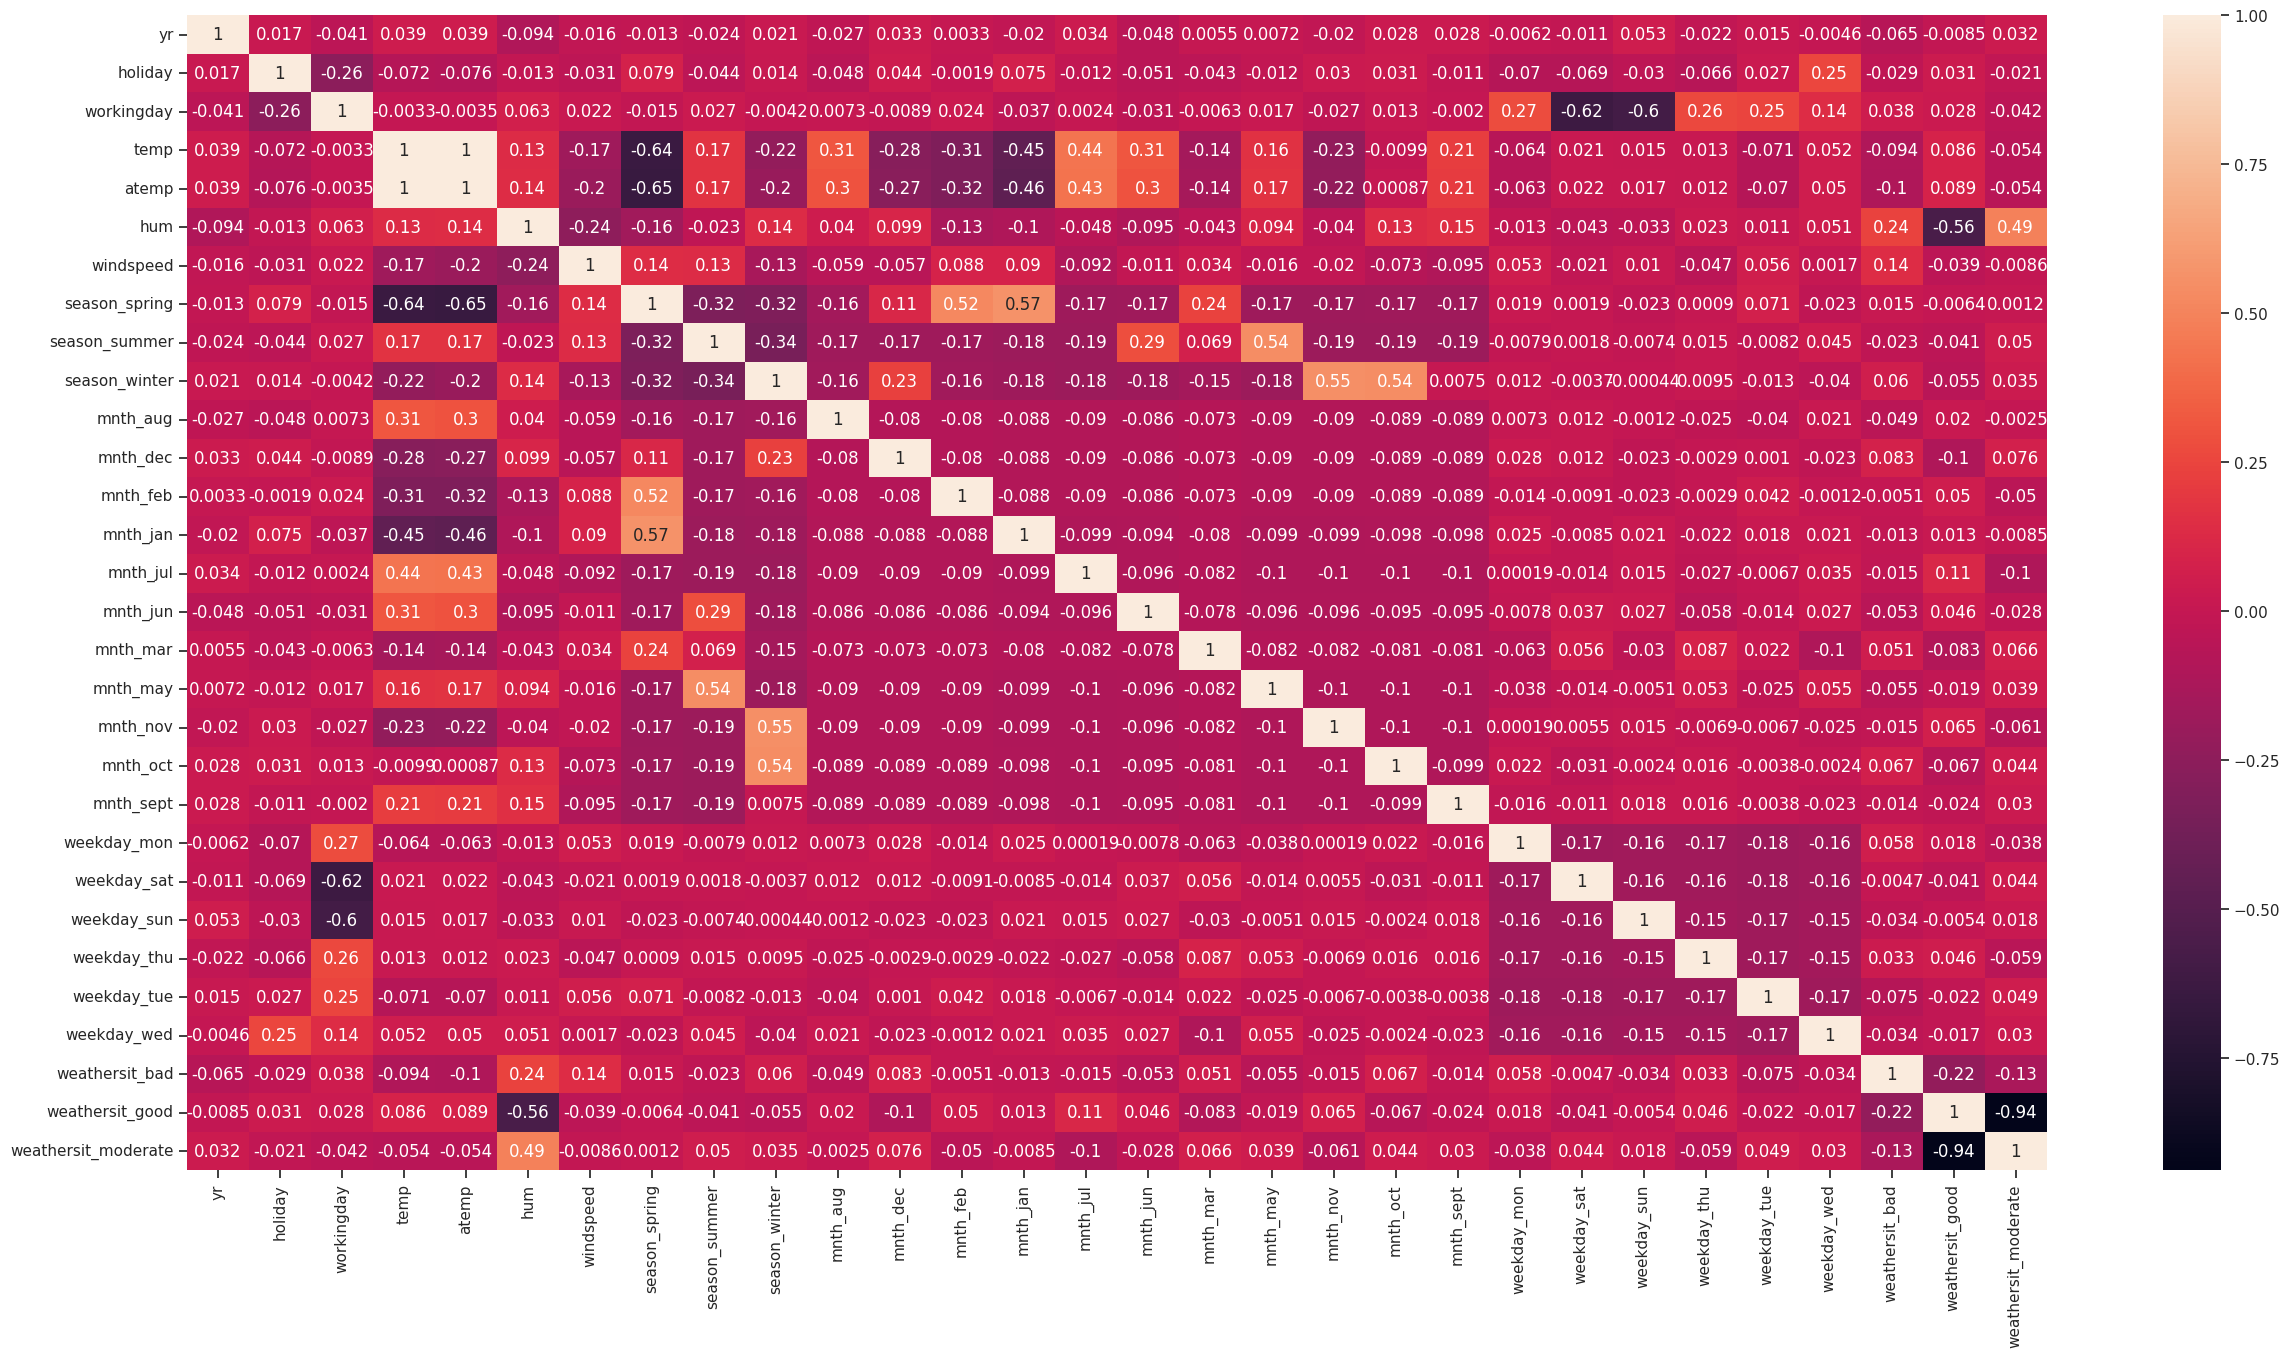

In [251]:
plt.figure(figsize=(30, 15))
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [252]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [253]:
# Cutting the features
rfe = RFE (lr,  n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [254]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', True, 1),
 ('mnth_aug', False, 13),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 9),
 ('mnth_jan', False, 15),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 11),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 2),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 4),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 5),
 ('weekday_sat', False, 12),
 ('weekday_sun', False, 14),
 ('weekday_thu', False, 16),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 6),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 3)]

In [255]:
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    model = sm.OLS(y_train, X_train_sm).fit()
    print(model.summary())
    return model

In [256]:
def get_vif(cols):
    X_subset = X_train[cols]
    vif_data = pd.DataFrame({'Features': cols, 'VIF': [variance_inflation_factor(X_subset.values, i) for i in range(X_subset.shape[1])]})
    vif_data['VIF'] = round(vif_data['VIF'], 2)
    print(vif_data.sort_values(by='VIF', ascending=False))

In [257]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [258]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jan',
       'mnth_jun', 'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'weathersit_moderate'],
      dtype='object')

In [259]:
columns_to_select = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
                     'season_spring', 'season_summer', 'season_winter',
                     'mnth_jan', 'mnth_jul', 'mnth_sept',
                     'weekday_sat', 'weathersit_bad', 'weathersit_moderate']
X_train_rfe = X_train.loc[:, columns_to_select]

In [260]:
X_train_rfe.shape

(511, 15)

In [261]:
# Specify the columns
selected_columns = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
                     'season_spring', 'season_summer', 'season_winter',
                     'mnth_jan', 'mnth_jul', 'mnth_sept',
                     'weekday_sat', 'weathersit_bad', 'weathersit_moderate']
# Build the model
model = build_model(selected_columns)
# Get VIF
get_vif(selected_columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     165.0
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          1.70e-181
Time:                        04:35:49   Log-Likelihood:                -4134.9
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     495   BIC:                             8370.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2809.2461    

In [262]:
# Specify the columns
selected_columns = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
                     'season_spring', 'season_summer', 'season_winter',
                     'mnth_jul', 'mnth_sept',
                     'weekday_sat', 'weathersit_bad', 'weathersit_moderate']
# Build the model
model = build_model(selected_columns)
# Get VIF
get_vif(selected_columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          1.35e-182
Time:                        04:35:49   Log-Likelihood:                -4135.0
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     496   BIC:                             8363.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2792.2799    

In [263]:
# Specify the columns
selected_columns = ['yr', 'holiday', 'workingday', 'temp', 'windspeed',
                     'season_spring', 'season_summer', 'season_winter',
                     'mnth_jul', 'mnth_sept',
                     'weekday_sat', 'weathersit_bad', 'weathersit_moderate']
# Build the model
model = build_model(selected_columns)
# Get VIF
get_vif(selected_columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.6
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          3.37e-180
Time:                        04:35:49   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8315.
Df Residuals:                     497   BIC:                             8374.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2004.0762    

In [264]:
# Specify the columns
selected_columns = ['yr', 'workingday', 'temp', 'windspeed',
                     'season_spring', 'season_summer', 'season_winter',
                     'mnth_jul', 'mnth_sept',
                     'weekday_sat', 'weathersit_bad', 'weathersit_moderate']
# Build the model
model = build_model(selected_columns)
# Get VIF
get_vif(selected_columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.1
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          1.51e-178
Time:                        04:35:49   Log-Likelihood:                -4150.1
No. Observations:                 511   AIC:                             8326.
Df Residuals:                     498   BIC:                             8381.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1845.8415    

In [265]:
# Specify the columns
selected_columns = ['yr', 'workingday', 'temp', 'windspeed',
                     'season_spring', 'season_summer', 'season_winter',
                     'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_moderate']
# Build the model
model = build_model(selected_columns)
# Get VIF
get_vif(selected_columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.0
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          8.20e-179
Time:                        04:35:49   Log-Likelihood:                -4152.2
No. Observations:                 511   AIC:                             8328.
Df Residuals:                     499   BIC:                             8379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1779.2943    

In [266]:
# Specify the columns
selected_columns = ['yr', 'season_spring', 'mnth_jul',
                     'season_winter', 'mnth_sept', 'weekday_sun',
                     'weathersit_bad', 'weathersit_moderate', 'temp']
# Build the model
model = build_model(selected_columns)
# Get VIF
get_vif(selected_columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          9.73e-178
Time:                        04:35:49   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

In [267]:
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [268]:
cols6 = ['yr', 'season_spring', 'mnth_jul',
         'season_winter', 'mnth_sept', 'weekday_sun',
         'weathersit_bad', 'weathersit_moderate', 'temp']
lr = build_model_sk(X_train[cols6], y_train)
print(f"Intercept: {lr.intercept_}")
print(f"Coefficients: {lr.coef_}")

Intercept: 1740.7372440164281
Coefficients: [ 1994.67955569 -1167.70089558  -514.63181313   496.75430396
   465.92729708   190.37518346 -2256.10482681  -662.38986442
  3984.25555511]


In [269]:
y_train_pred = lr.predict(X_train[cols6])

In [270]:
def plot_res_dist(act, pred):
    sns.histplot(act - pred, kde=True)
    plt.title('Error Terms')
    plt.xlabel('Errors')
    plt.show()

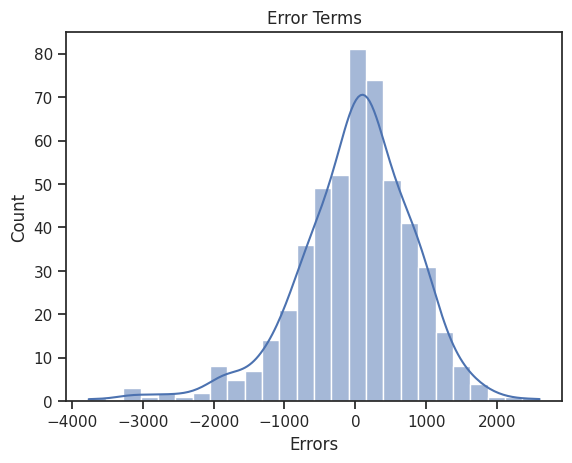

In [271]:
plot_res_dist(y_train, y_train_pred)

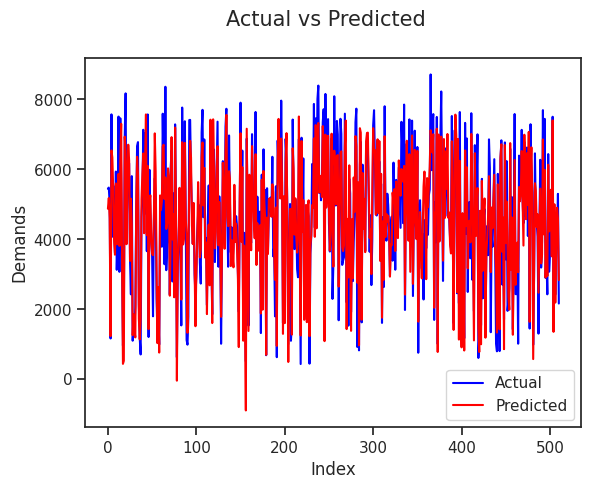

In [272]:
c = range(len(X_train))
plt.plot(c, y_train, color="blue", label="Actual")
plt.plot(c, y_train_pred, color="red", label="Predicted")
plt.suptitle('Actual vs Predicted', fontsize=15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.legend()
plt.show()

In [273]:
r2_score(y_train,y_train_pred)

0.8158045196281631

In [274]:
num_vars = ['temp','atemp','hum','windspeed']
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [275]:
cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']
y_test_pred = lr.predict(X_test[cols6])

In [276]:
r2_score(y_test,y_test_pred)

0.8127228702995222

In [277]:
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.8127228702995222

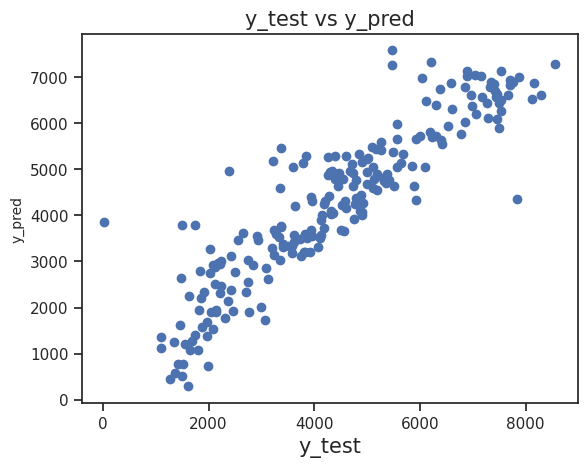

In [278]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.set_title('y_test vs y_pred', fontsize=15)
ax.set_xlabel('y_test', fontsize=15)
ax.set_ylabel('y_pred', fontsize=10)
plt.show()

In [279]:
cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']
lm = build_model(cols6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          9.73e-178
Time:                        04:35:50   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    